In [2]:
import os
import h5py
import sv as SV
import numpy as np
import astropy.table as atable
from astropy.cosmology import FlatLambdaCDM

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [23]:
#dat_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper/'
#sv1 = atable.Table.read(os.path.join(dat_dir, 'ztile-sv1-bright-cumulative.fits'))
sv3 = atable.Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_ANY_full.dat.fits')   

In [24]:
sv3[:2]

RA,DEC,TARGETID,PRIORITY_INIT,ZWARN_MTL,TARGET_STATE,TIMESTAMP,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS
float64,float64,int64,int64,int64,bytes30,bytes25,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,int64,float64
212.0643478639728,-2.1391282868340644,39627733927462189,102000,-1,BGS|UNOBS,2021-04-04T23:14:10,1464,532,5321464,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,65537,0,9010,318256,2121m022,1325,EXP,0.0587148,6.555222,13.3910675,21.741327,295.16772,85.85878,8.545478,0.84045845,0.8895144,0.9366095,0.02381601,0.017788103,-0.0844763,0.012733676,0.3003631,0.36684817,1.0,1.0000001,0.666957,3,3,2,1462.4911,668.6921,40.75251,965.37305,431.55347,21.303154,22.15747,12.764697,2.3427615,0.5372147,0.99009895,0.9939078,0,0,0,1.4418324,2.9453886,4.782043,1.4418327,2.945389,4.782043,0,0,0,S,1,532,5321464,False,1,1.0,0.5111111111111111,17.0,1.705801337775986,0.3333333333333333,-9077849473895366652 .. -9079256848778624000,0.078125
212.0693218972628,-2.1273874843538465,39627733927462296,102000,-1,BGS|UNOBS,2021-04-04T23:14:10,1442,526,5261442,8824.427839040756,482.5054537013926 .. 15.800043757133652,0.21160434706356537,6.260086188727184e-06,0,7906,GALAXY,,10,1726.4296572208405,515,0,161.5416,-367.17703,1,313.4244,1,0.004,0.004,0.004,0.004,0.7561018,0.017502658,9.639565,107.33459,0.45401272,0.20817538,6.0370417,0.008192336,535.1761,1.756967,8.558108,18.528126,0.0,958.16797,3.995762,9.203174,24.58267,9.647758,1600.6787,6.206742,17.969458,5764607523034234880,65537,0,9010,318256,2121m022,1432,REX,0.058680348,7.6130943,13.706715,19.975285,456.75,218.06201,36.457344,0.84054416,0.8895755,0.93664545,0.009103314,0.011520403,0.0125142215,0.0022773708,0.0023142737,0.004421474,0.9996048,0.99950814,0.9990608,3,3,3,1462.4911,668.6921,105.995514,965.37305,431.5

In [6]:
# sv1_bright = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
# sv1_faint  = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0 

sv3_bright = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_faint  = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

In [14]:
# sv1_cuts = ((sv1['Z'] != 1e20) & (sv1['ZWARN'] == 0) & (sv1['DELTACHI2'] > 15))
sv3_cuts = ((sv3['Z'] != 1e20) & (sv3['ZWARN'] == 0) & (sv3['DELTACHI2'] > 40))
print(np.mean(sv3_cuts))

0.9288539635974223


In [15]:
# print('SV1: %i redshifts' % np.sum(sv1_cuts))
print('SV3: %i redshifts' % np.sum(sv3_cuts))

SV3: 246333 redshifts


In [16]:
def stephist(nh, _edges):
    bin_edges = np.sort(list(_edges) + list(_edges[1:-1]))
    return bin_edges, np.array([[x, x] for x in nh]).flatten()

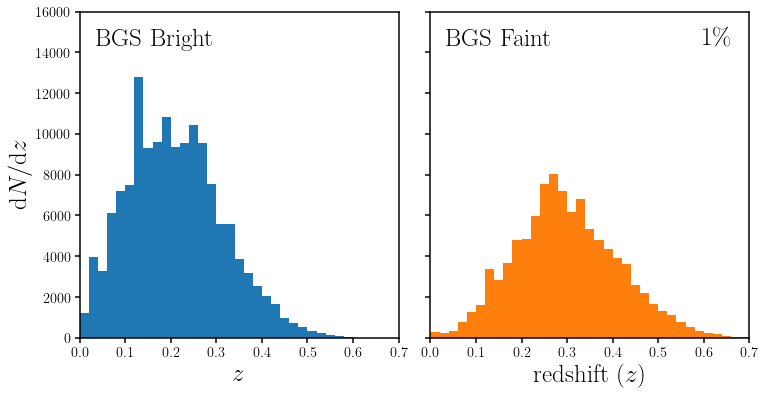

In [29]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)

# nh, edges = np.histogram(sv1['Z'][sv1_bright & sv1_cuts], range=(0., 0.6), bins=30)
# bin_edges, nhist0 = stephist(nh, edges)

# sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C0', hatch='/')
# sub.plot(bin_edges, nhist0, c='k')


nh, edges = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist1 = stephist(nh, edges)
nhist0 = np.zeros(len(bin_edges))
sub.fill_between(bin_edges, nhist0, nhist0 + nhist1, facecolor='C0')

sub.text(0.05, 0.95, 'BGS Bright', ha='left', va='top', transform=sub.transAxes, fontsize=25)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'${\rm d}N/{\rm d}z$', fontsize=25)
sub.set_ylim(0., 1.6e4)

sub = fig.add_subplot(122)

# nh, edges = np.histogram(sv1['Z'][sv1_faint & sv1_cuts], range=(0., 0.7), bins=35)
# bin_edges, nhist0 = stephist(nh, edges)

# sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C1', hatch='/', label='SV1')
# sub.plot(bin_edges, nhist0, c='k')

nh, edges = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], range=(0., 0.7), bins=35)
bin_edges, nhist1 = stephist(nh, edges)
nhist0 = np.zeros(len(bin_edges))
sub.fill_between(bin_edges, nhist0, nhist0 + nhist1, facecolor='C1', label=r'$1\%$')

sub.text(0.05, 0.95, 'BGS Faint', ha='left', va='top', transform=sub.transAxes, fontsize=25)
sub.text(0.95, 0.95, '1\%', ha='right', va='top', transform=sub.transAxes, fontsize=25)

#sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
sub.set_xlabel('redshift ($z$)', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_yticklabels([])
sub.set_ylim(0., 1.6e4)

fig.subplots_adjust(wspace=0.1)
fig.savefig('figs/dndz.pdf', bbox_inches='tight')

In [31]:
zlow, zhigh, volz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_ANY_nz.dat', skiprows=2, unpack=True, usecols=[1, 2, 5])

In [34]:
zlim = (zlow < 0.7)

zlow = zlow[zlim]
zhigh = zhigh[zlim]
volz = volz[zlim]

In [45]:
nz_all, zedges = np.histogram(sv3['Z'][sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_bright, _ = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_faint, _ = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))

nz_all = nz_all.astype(float) / volz
nz_bright = nz_bright.astype(float) / volz
nz_faint = nz_faint.astype(float) / volz

In [87]:
# SDSS MGS n(z)
sdss_dr16 = atable.Table.read('/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/specObj-dr16.fits')
is_mgs = ((sdss_dr16['LEGACY_TARGET1']  & (64 | 128 | 256)) > 0)
nz_mgs, _ = np.histogram(sdss_dr16['Z'][is_mgs], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_mgs = nz_mgs.astype(float) / (volz / 168.8 * 7500.)

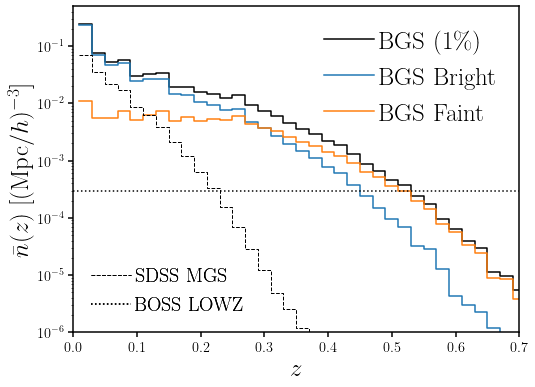

In [83]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

bin_edges, nhist = stephist(nz_all, zedges)
sub.plot(bin_edges, nhist, c='k', label='BGS ($1\%$)')

bin_edges, nhist = stephist(nz_bright, zedges)
sub.plot(bin_edges, nhist, c='C0', label='BGS Bright')

bin_edges, nhist = stephist(nz_faint, zedges)
sub.plot(bin_edges, nhist, c='C1', label='BGS Faint')

bin_edges, nhist = stephist(nz_mgs, zedges)
_sdss, = sub.plot(bin_edges, nhist, c='k', ls='--', lw=1)#, label='SDSS MGS')
_lowz = sub.axhline(3e-4, color='k', linestyle=':')#, label='BOSS LOWZ')

legend1 = sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
fig.gca().add_artist(legend1)
legend2 = sub.legend([_sdss, _lowz], ['SDSS MGS', 'BOSS LOWZ'], loc='lower left', handletextpad=0.2, fontsize=20)
fig.gca().add_artist(legend2)


sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'$\bar{n}(z)$ [$({\rm Mpc}/h)^{-3}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-6, None)
fig.savefig('figs/nofz.pdf', bbox_inches='tight')

In [90]:
for name in np.unique(sdss_dr16['PROGRAMNAME']):
    print('.%s.' % name)

.DEEP_QSO                   .
.ELG_NGC                    .
.ELG_SGC                    .
.Orion_Taurus               .
.RM                         .
.SEGUE_GES                  .
.SEQUELS_ELG                .
.XMMXLL                     .
.apbias                     .
.boss                       .
.boss_lofar                 .
.commissioning              .
.disk                       .
.eboss                      .
.fstars                     .
.hyades                     .
.legacy                     .
.lowz                       .
.lowz_loveday               .
.lowz_lrg                   .
.m31_fstars                 .
.msturnoff                  .
.orion                      .
.perseus                    .
.photoz                     .
.preboss                    .
.premarvels_preselection    .
.reddening                  .
.segcluster                 .
.segclusterf                .
.seglowlat                  .
.seglowlatf                 .
.segpointed                 .
.segpointe